<a href="https://colab.research.google.com/github/Black-Viking-B02/IMDB_dataset/blob/main/NewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Class Classification

In this notebook, we'll build a a network to classify Reuters newswires into 46 exclusive topics.


## 1-Loading the Dataset
The Reuters dataset comes packaged as part of Keras.

In [2]:
from keras.datasets import reuters
(train_data , train_labels) , (test_data, test_labels) =reuters.load_data(
    num_words=10000
)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


As with the IMDB reviews, each example is a list of integers.

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## 2-Preparing the Data
You can vectorize the data with the exact same code as in the previous example:

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

The label associated with an example is an integer between 0 and 45.
To vectorize the labels, there are two options: You can cast the label list as 
an integer tensor, or you can use one-hot coding. In this case, one-hot encoding of
the labels consists of embedding each label as an all-zero vector with a 1 in the place of
the label index.

In [5]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3-Building Your Network
The number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

In [8]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

## 4-Validating Your Model
Let's set apart 1000 samples in the training data to use as a validation set.

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 51ms/step - loss: 2.9567 - accuracy: 0.4547 - val_loss: 1.5802 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 1.4107 - accuracy: 0.6970 - val_loss: 1.2605 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.0383 - accuracy: 0.7714 - val_loss: 1.1168 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 37ms/step - loss: 0.8178 - accuracy: 0.8206 - val_loss: 1.0177 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 38ms/step - loss: 0.6151 - accuracy: 0.8708 - val_loss: 0.9555 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.5052 - accuracy: 0.8953 - val_loss: 0.9259 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.4084 - accuracy: 0.9118 - val_loss: 0.9061 - val_accuracy: 0.8050
Epoch 8/20
16

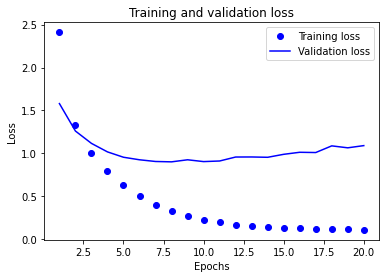

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: ignored

<Figure size 432x288 with 0 Axes>